In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
Data = pd.read_csv('../Project 4/Resources/raw_dataset.csv')

In [3]:
# Print the shape of the data

print(Data.shape)

(1309, 13)


In [4]:
# View the summary statistic of all columns including non-numeric columns

Data.describe(include ='all')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
count,1309.000000,1309.000000,1309,1309,1046.000000,1309.000000,1309.000000,1309,1308.000000,295,1307,486,121.000000
unique,NaN,NaN,1307,2,NaN,NaN,NaN,929,NaN,186,3,27,NaN
top,NaN,NaN,Connolly. Miss. Kate,male,NaN,NaN,NaN,CA. 2343,NaN,C23 C25 C27,S,13,NaN
freq,NaN,NaN,2,843,NaN,NaN,NaN,11,NaN,6,914,39,NaN
mean,2.294882,0.381971,NaN,NaN,29.881135,0.498854,0.385027,NaN,33.295479,NaN,NaN,NaN,160.809917
std,0.837836,0.486055,NaN,NaN,14.413500,1.041658,0.865560,NaN,51.758668,NaN,NaN,NaN,97.696922
min,1.000000,0.000000,NaN,NaN,0.166700,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,1.000000
25%,2.000000,0.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,72.000000
50%,3.000000,0.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,155.000000
75%,3.000000,1.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.275000,NaN,NaN,NaN,256.000000


In [5]:
Data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN


In [6]:
# Find the number of missing values

Data.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age          263
sibsp          0
parch          0
ticket         0
fare           1
cabin       1014
embarked       2
boat         823
body        1188
dtype: int64

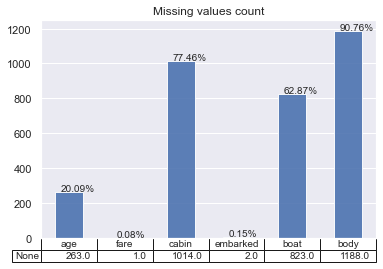

In [7]:
# Missing values

# number of rows
rows_length = Data.shape[0]
# fields with missing value count
fields_with_nan_length = Data.isna().sum().where(lambda x : x > 0).dropna()

ax = fields_with_nan_length \
.plot(kind='bar', alpha=0.9, title='Missing values count', table=True)
ax.xaxis.set_visible(False) # hide x axis labels


# write percentage on top of each bar
for i in ax.patches:
    ax.text(i.get_x()+.1, i.get_height()+5, \
            str(round((i.get_height()/rows_length)*100, 2))+'%')

In [8]:
# Creating a function to fill missing values in Age with the help of Pclass

def fill_age(cols):
    age = cols[0]
    pclass = cols[1]
    
    if pd.isnull(age):
        if pclass == 1:
            return 37
        
        if pclass == 2:
            return 29
        
        if pclass == 3:
            return 24
        
        
    else:
        return age

In [9]:
# Filling missing values
Data['age']= Data[['age', 'pclass']].apply(fill_age, axis=1)
Data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,S,2,NaN
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0
1305,3,0,Zabour. Miss. Thamine,female,24.0000,1,0,2665,14.4542,NaN,C,NaN,NaN
1306,3,0,Zakarian. Mr. Mapriededer,male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0
1307,3,0,Zakarian. Mr. Ortin,male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN


In [10]:
# Perform one-hot coding to represent categorical column as numerical column.
# drop_first = True: drop the first encoded column to avoid multicollinearity (a situation where two or more variables are highly correlated).

embarked = pd.get_dummies(Data['embarked'])
sex = pd.get_dummies(Data['sex'])
pclass = pd.get_dummies(Data['pclass'])

Data = pd.concat([Data,embarked, sex, pclass], axis=1)
Data

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,...,boat,body,C,Q,S,female,male,1,2,3
0,1,1,Allen. Miss. Elisabeth Walton,female,29.0000,0,0,24160,211.3375,B5,...,2,NaN,0,0,1,1,0,1,0,0
1,1,1,Allison. Master. Hudson Trevor,male,0.9167,1,2,113781,151.5500,C22 C26,...,11,NaN,0,0,1,0,1,1,0,0
2,1,0,Allison. Miss. Helen Loraine,female,2.0000,1,2,113781,151.5500,C22 C26,...,NaN,NaN,0,0,1,1,0,1,0,0
3,1,0,Allison. Mr. Hudson Joshua Creighton,male,30.0000,1,2,113781,151.5500,C22 C26,...,NaN,135.0,0,0,1,0,1,1,0,0
4,1,0,Allison. Mrs. Hudson J C (Bessie Waldo Daniels),female,25.0000,1,2,113781,151.5500,C22 C26,...,NaN,NaN,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,Zabour. Miss. Hileni,female,14.5000,1,0,2665,14.4542,NaN,...,NaN,328.0,1,0,0,1,0,0,0,1
1305,3,0,Zabour. Miss. Thamine,female,24.0000,1,0,2665,14.4542,NaN,...,NaN,NaN,1,0,0,1,0,0,0,1
1306,3,0,Zakarian. Mr. Mapriededer,male,26.5000,0,0,2656,7.2250,NaN,...,NaN,304.0,1,0,0,0,1,0,0,1
1307,3,0,Zakarian. Mr. Ortin,male,27.0000,0,0,2670,7.2250,NaN,...,NaN,NaN,1,0,0,0,1,0,0,1


In [11]:
Data.drop(['boat','body','embarked','name','ticket','cabin','sex'],axis=1,inplace=True)
Data

,pclass,survived,age,sibsp,parch,fare,C,Q,S,female,male,1,2,3
0,1,1,29.0000,0,0,211.3375,0,0,1,1,0,1,0,0
1,1,1,0.9167,1,2,151.5500,0,0,1,0,1,1,0,0
2,1,0,2.0000,1,2,151.5500,0,0,1,1,0,1,0,0
3,1,0,30.0000,1,2,151.5500,0,0,1,0,1,1,0,0
4,1,0,25.0000,1,2,151.5500,0,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,14.5000,1,0,14.4542,1,0,0,1,0,0,0,1
1305,3,0,24.0000,1,0,14.4542,1,0,0,1,0,0,0,1
1306,3,0,26.5000,0,0,7.2250,1,0,0,0,1,0,0,1
1307,3,0,27.0000,0,0,7.2250,1,0,0,0,1,0,0,1


In [12]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    1309 non-null   int64  
 1   survived  1309 non-null   int64  
 2   age       1309 non-null   float64
 3   sibsp     1309 non-null   int64  
 4   parch     1309 non-null   int64  
 5   fare      1308 non-null   float64
 6   C         1309 non-null   uint8  
 7   Q         1309 non-null   uint8  
 8   S         1309 non-null   uint8  
 9   female    1309 non-null   uint8  
 10  male      1309 non-null   uint8  
 11  1         1309 non-null   uint8  
 12  2         1309 non-null   uint8  
 13  3         1309 non-null   uint8  
dtypes: float64(2), int64(4), uint8(8)
memory usage: 71.7 KB
